In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Ex1

In [4]:
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Ex2

Text(0, 0.5, 'Profit in $10.000')

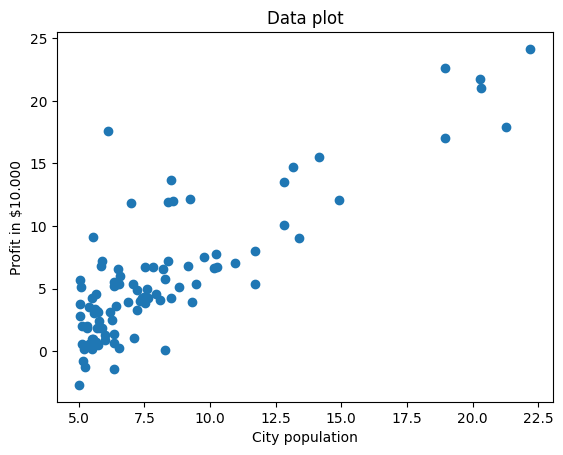

In [6]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x, y)
plt.title('Data plot')
plt.xlabel('City population')
plt.ylabel('Profit in $10.000')

# Ex3

In [7]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)


# Ex4

In [8]:
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)


# Ex5

In [9]:
def h(X, theta):
    return theta.T@X

In [10]:
def computeCost(X, y, theta):
    return ((h(X, theta) - y)**2).sum()/(X.shape[1]*2)

# Ex6

In [11]:
print(computeCost(X, y, theta))

32.072733877455676


# Ex7

In [12]:
def simple_gradient(X, y, theta, alpha=0.01, it=1000):
    cost = []
    theta_ = theta[::]
    for i in range(it):
        # theta0tmp = theta[0][0]-alpha*(h(X, theta)-y).sum()/X.shape[1]
        # theta1tmp = theta[1][0]-alpha*(h(X, theta)-y)@X[1:2][:].T/X.shape[1]
        # theta[0][0]=theta0tmp
        # theta[1][0]=theta1tmp
        theta_ -= (alpha*(h(X, theta)-y)@X.T).T/X.shape[1]
        cost.append(computeCost(X, y, theta_))

    return theta, cost

In [13]:
# print(simple_gradient(X, y, theta))

# Ex 8, 9, 10

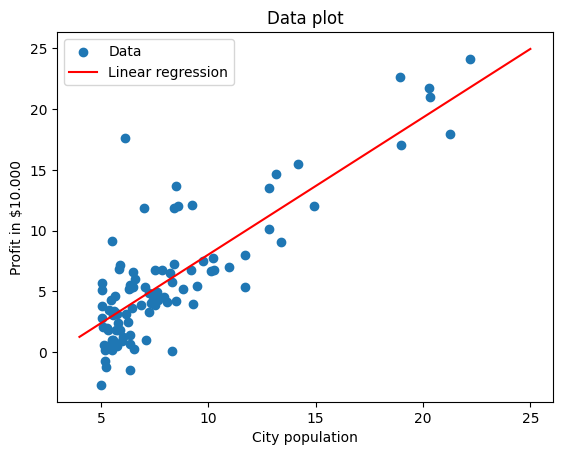

In [14]:
plt.scatter(x, y, label='Data')
plt.title('Data plot')
plt.xlabel('City population')
plt.ylabel('Profit in $10.000')
th, cost = simple_gradient(X, y, theta)
x_ = np.linspace(4, 25)
plt.plot(x_, th[1]*x_ + th[0], 'r', label='Linear regression')
plt.legend()

# Ex 11

Text(0, 0.5, 'Cost function')

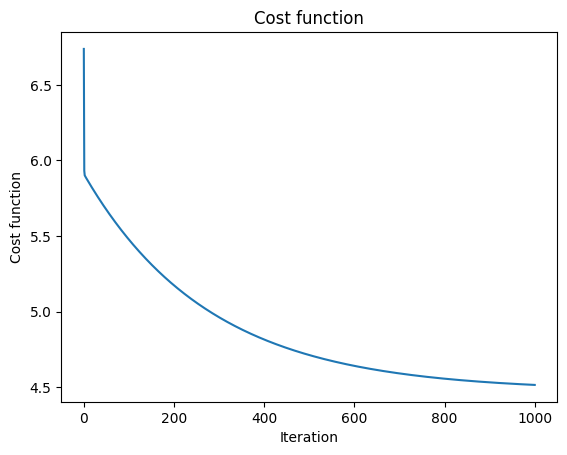

In [15]:
plt.plot(np.linspace(0, 1000, 1000), cost)
plt.title('Cost function')
plt.xlabel('Iteration')
plt.ylabel('Cost function')

# Linear regression with multiple variables

# Ex1

In [16]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Text(0.5, 0.92, 'Data 2')

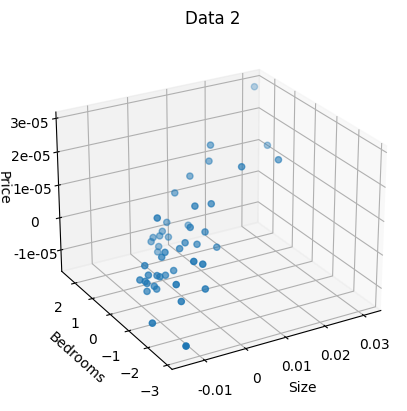

In [29]:
import matplotlib.ticker as ticker

x = data2.values[:, 0]
y = data2.values[:, 1]
z = data2.values[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/100))
ax.xaxis.set_major_formatter(ticks_x)

ticks_z = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/100000))
ax.zaxis.set_major_formatter(ticks_z)

ax.scatter(x, y, z)
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(25, 240, 0)
ax.set_title('Data 2')

# Ex2

In [30]:
for key in data2.keys():
    data2[key]=(data2[key]-data2[key].mean())/data2[key].std()

In [50]:
x = data2.values[:, 0]
y = data2.values[:, 1]
z = data2.values[:, 2]

# Ex3

In [51]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x, y], axis=0)

# Ex4

In [52]:
z.shape = [1, z.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

# Ex6

In [47]:
print(computeCost(X, z, theta))

0.48936170212765967


# Ex 8, 9, 10

In [58]:
th, cost = simple_gradient(X, z, theta)

In [61]:
print(th)
print(cost[-1])

[[-4.0475360e-17]
 [ 8.8476145e-01]
 [-5.3176090e-02]]
0.1306864805459687


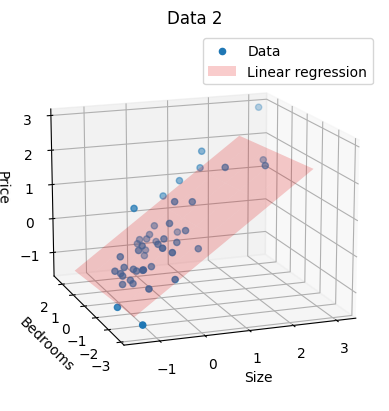

In [102]:
import matplotlib as mpl
x_range = np.arange(x.min(), x.max())
y_range = np.arange(y.min(), y.max())
X, Y = np.meshgrid(x_range, y_range)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, label='Data')

Z = th[0] + X*th[1] + Y*th[2]

lr = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2, color='r', label='Linear regression')
ax.view_init(15, 250, 0)
ax.set_title('Data 2')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 's')
lr._edgecolors2d = lr._edgecolor3d
lr._facecolors2d = lr._facecolor3d
ax.legend()

# Ex 11

Text(0, 0.5, 'Cost function')

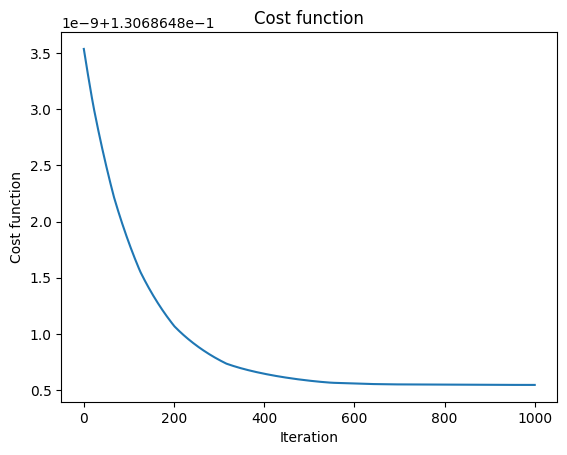

In [87]:
plt.plot(np.linspace(0, 1000, 1000), cost)
plt.title('Cost function')
plt.xlabel('Iteration')
plt.ylabel('Cost function')